## Exploração de um projeto QGIS

O QGIS permite ser utilizado a partir do Python, de acordo com a API [PyQGIS](https://docs.qgis.org/testing/en/docs/pyqgis_developer_cookbook/).

Neste notebook usa-se o projeto QGIS existente (disponível no repositório).

O objetivo é usar as composições de impressão existentes.

Desta forma, podem-se preprar sofisticadas composições de impressão no QGIS, com a GUI e depois utilizá-las num notebook.

## Inicialização

Nota: esta é uma ligação ao QGIS (não standard). Retire os paths específicos aqui usados.

In [1]:
import os
import sys
from osgeo import ogr
sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True) 
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()

#### Abrir o projeto existente

In [2]:
projectName = '../qgis/dados-dgs.qgz'
project = QgsProject.instance()
# demora a ler o projeto...
print("Abrindo o projeto guardado como {}...".format(projectName))
project.read(projectName)
print("... projeto {} pronto para processar!".format(project.title()))

Abrindo o projeto guardado como ../qgis/dados-dgs.qgz...
... projeto COVID-19 pronto para processar!


### Refresh dos layers
Garantir que o QGIS vai buscar os dados de novo à fonte dos mesmos.

In [4]:
for layer in QgsProject.instance().mapLayers().values():
    print('reload layer {}'.format( layer.name() ))
    layer.reload()

reload layer CAOP_COVID
reload layer CAOP_COVIDpoint_Merge
reload layer CAOP_TodosMun_Dissolve
reload layer COVID19_CasosPorRegiao
reload layer COVID19_Indicadores
reload layer COVID19_PorDistrito
reload layer COVID19_Survey
reload layer CasosImport2303Pontos
reload layer CasosImport2603
reload layer CasosPorDistrito
reload layer Covid_Fronteiras_PT_ES
reload layer Regioes_Portugal
reload layer concelho
reload layer confirmados_concelho
reload layer confirmados_distrito_ilha
reload layer distrito
reload layer raa_central_concelho
reload layer raa_central_ilha
reload layer raa_ocidental_concelho
reload layer raa_ocidental_ilha
reload layer raa_oriental_concelho
reload layer raa_oriental_ilha
reload layer ram_concelho
reload layer ram_ilha
reload layer situacao_epidemiologica


### Pedir uma composição existente

In [5]:
from datetime import datetime
altdate = datetime.now()

manager = project.layoutManager()

layoutName = 'concelho_continente'
imagem_concelhos = '/tmp/concelho_continente_{}.png'.format( altdate.strftime("%Y%m%d") )
layout = manager.layoutByName(layoutName)
if layout:
    titulo = layout.itemById('titulo');
    titulo.setText("Casos de COVID-19 confirmados por concelho\n{}".format( altdate.strftime("%A, %d de %B de %Y") ))
    exporter = QgsLayoutExporter(layout)
    # print("A exportar a composição {} em PDF...".format(layoutName))
    # exporter.exportToPdf('distrito_continente_{}.pdf'.format(args.date), QgsLayoutExporter.PdfExportSettings())
    print("A exportar a composição {} em PNG...".format(layoutName))
    exporter.exportToImage( imagem_concelhos, QgsLayoutExporter.ImageExportSettings() )
    print("Feito!")
else:
    print('Problema a ler as composições do projeto')

A exportar a composição concelho_continente em PNG...
Feito!


### Render da imagem
Por simplicidade, a imagem foi exportada para ficheiro e é agora renderizada.

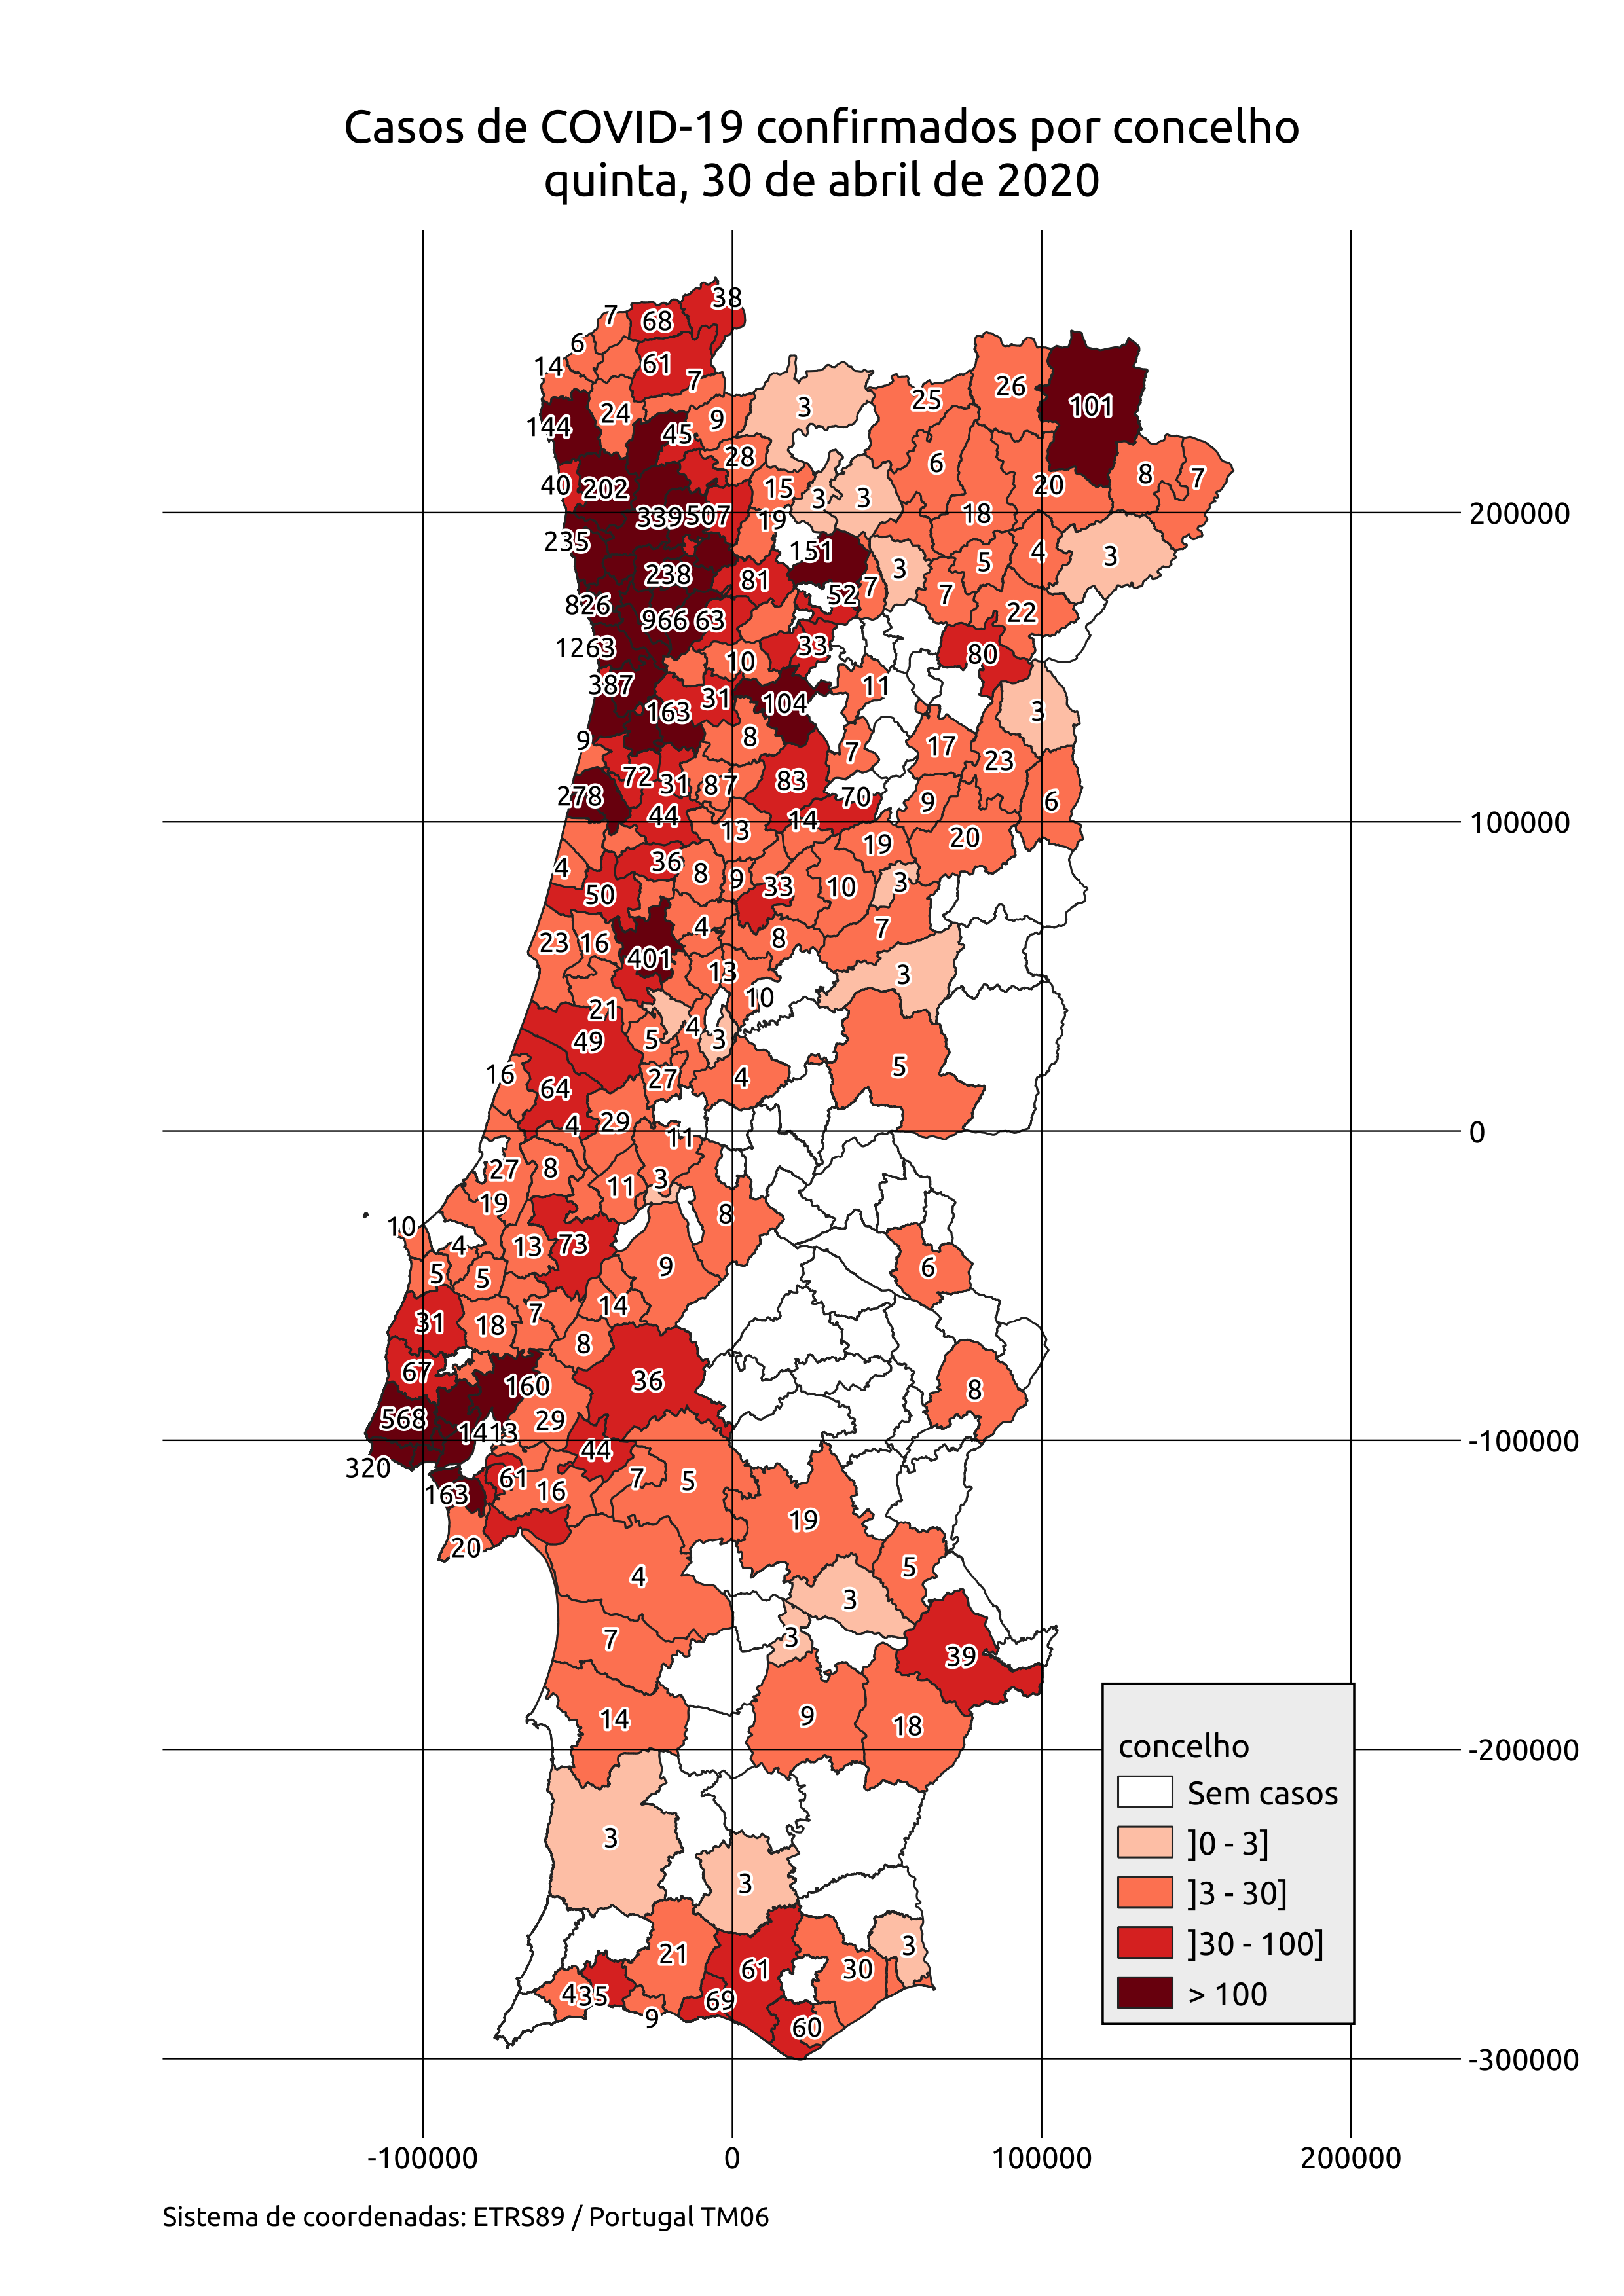

In [6]:
from IPython.display import Image
Image( imagem_concelhos )